Data-Driven insights and 3 recommendations for a leading Health jobboard Sales Team Leaderships


Author: Lyushen (Abraham) Song






# Introduction

By analyzing the CMS Payroll-Based Journal (PBJ) Daily Nurse Staffing data for Q2 2024 and CMS datasets, the goal is to uncover business insights to guide a leading Health jobboard's sales team. Specifically, the analysis explores contractor reliance, staffing shortages, and penalties to identify facilities and regions that would benefit most from leading Health jobboard's service and in return guide the sales team.

In [ ]:
# Import Necessary Pacakges and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive

In [ ]:

drive.mount('/content/drive')

# Path to CSV file in Google Drive
file_path = '/content/drive/MyDrive/Clipboard interview /PBJ_Daily_Nurse_Staffing_Q2_2024.csv'

# Import the CSV file into a pandas DataFrame

df = pd.read_csv(file_path, encoding='cp1252')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-174-dc62f2515b99>:8: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240401,51,10.77,...,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240402,52,8.43,...,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240403,53,11.13,...,0.0,150.31,150.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240404,52,12.27,...,0.0,133.01,133.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240405,52,4.95,...,0.0,137.92,137.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS',
       'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
       'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr'],
      dtype='object')

# Data Exploration

In [ ]:
df.isnull().sum()

,0
PROVNUM,0
PROVNAME,0
CITY,0
STATE,0
COUNTY_NAME,0
COUNTY_FIPS,0
CY_Qtr,0
WorkDate,0
MDScensus,0
Hrs_RNDON,0


No null values were detected

In [ ]:
df.describe()

,COUNTY_FIPS,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
count,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,...,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06,1.325324e+06
mean,9.113430e+01,2.024052e+07,8.341670e+01,5.195887e+00,5.099312e+00,9.657448e-02,1.026275e+01,1.001164e+01,2.511122e-01,3.480192e+01,...,6.133439e+00,1.737908e+02,1.616093e+02,1.218150e+01,4.314155e+00,4.262067e+00,5.208815e-02,8.578327e+00,8.363303e+00,2.150232e-01
std,9.912806e+01,8.167078e+01,4.904109e+01,4.389664e+00,4.382255e+00,9.182349e-01,1.476875e+01,1.455953e+01,1.845270e+00,3.532269e+01,...,1.963754e+01,1.151591e+02,1.081243e+02,3.184142e+01,1.336067e+01,1.302080e+01,2.011555e+00,1.785970e+01,1.749784e+01,2.104964e+00
min,1.000000e+00,2.024040e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e+01,2.024042e+07,5.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.325000e+01,...,0.000000e+00,9.857000e+01,9.025000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.900000e+01,2.024052e+07,7.600000e+01,8.000000e+00,8.000000e+00,0.000000e+00,7.500000e+00,7.500000e+00,0.000000e+00,2.575000e+01,...,0.000000e+00,1.506200e+02,1.400000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.170000e+02,2.024061e+07,1.040000e+02,8.000000e+00,8.000000e+00,0.000000e+00,1.600000e+01,1.600000e+01,0.000000e+00,4.525000e+01,...,4.000000e+00,2.200000e+02,2.074800e+02,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.131000e+01,1.087000e+01,0.000000e+00
max,8.400000e+02,2.024063e+07,7.420000e+02,1.039600e+02,1.039600e+02,2.575000e+01,2.755000e+02,2.755000e+02,8.725000e+01,9.159800e+02,...,1.380150e+04,1.758100e+03,1.503630e+03,6.614200e+02,4.437500e+02,4.387500e+02,2.470000e+02,4.298000e+02,4.298000e+02,8.775000e+01


<ipython-input-179-2a89a2578447>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




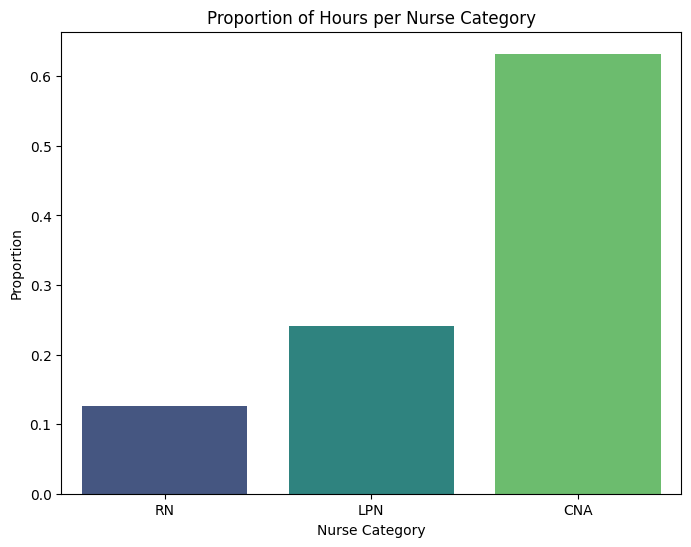

In [ ]:

# Calculate the sum of 'Hrs_RN', 'Hrs_LPN', and 'Hrs_CNA' for the entire dataset
total_hours = df['Hrs_RN'].sum() + df['Hrs_LPN'].sum() + df['Hrs_CNA'].sum()

# Calculate the proportion of each column
rn_proportion = df['Hrs_RN'].sum() / total_hours
lpn_proportion = df['Hrs_LPN'].sum() / total_hours
cna_proportion = df['Hrs_CNA'].sum() / total_hours

# Create a dictionary for plotting
data = {'Category': ['RN', 'LPN', 'CNA'], 'Proportion': [rn_proportion, lpn_proportion, cna_proportion]}
proportion_df = pd.DataFrame(data)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Proportion', data=proportion_df, palette='viridis')
plt.title('Proportion of Hours per Nurse Category')
plt.xlabel('Nurse Category')
plt.ylabel('Proportion')
plt.show()


The chart shows the proportion of total nursing hours contributed by each nurse category (Registered Nurses (RNs), Licensed Practical Nurses (LPNs), and Certified Nursing Assistants (CNAs)) across all facilities. It highlights that CNAs contribute a significantly larger share of the total nursing hours compared to RNs and LPNs. This suggests that CNAs play a critical role in direct patient care and make up the majority of nursing staff hours.
For the leading Health jobboard, which focuses on contractor staffing, this insight is valuable. It indicates that prioritizing the recruitment of CNA contractors could meet the higher demand from facilities, as they rely heavily on CNAs for day-to-day operations. By targeting CNA contractors, the leading Health jobboard can align its efforts with the staffing needs of long-term care facilities, potentially increasing placement opportunities and client satisfaction.


# Hypothesis and Assumption

 A leading Health jobboard is an online marketplace that connects healthcare professionals with open shifts at various healthcare facilities across the United States. And All workers from the leading Health jobboard (and our competitors) are classified as contractors. Therefore, the focus of this project is on contractor.  

**Assumption**:

One of the key assumption is that facilities with a higher number of contractor shifts are more likely to use the leading Health jobboard’s platform to find candidates. This assumption is based on the idea that contract-based healthcare professionals tend to transition between facilities more frequently compared to full-time employees. As a result, facilities that rely heavily on contractors experience higher turnover and a continuous need for staffing solutions.



In [ ]:
# Compute Contract Ratios to get ratio of contractors hour out of total hours for
# each facility
df['RN_Contract_Ratio'] = df['Hrs_RN_ctr'] / df['Hrs_RN']
df['LPN_Contract_Ratio'] = df['Hrs_LPN_ctr'] / df['Hrs_LPN']
df['CNA_Contract_Ratio'] = df['Hrs_CNA_ctr'] / df['Hrs_CNA']

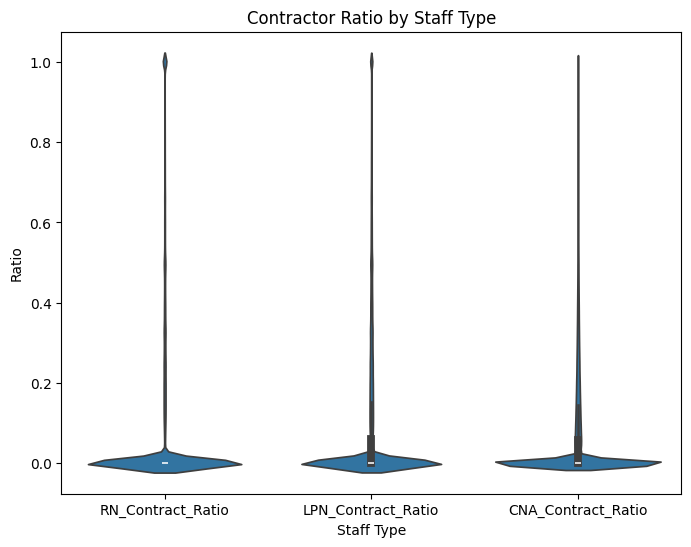

In [ ]:
# Melt the data for easier plotting
melted_df = df.melt(value_vars=['RN_Contract_Ratio', 'LPN_Contract_Ratio', 'CNA_Contract_Ratio'],
                    var_name='Staff Type', value_name='Ratio')

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.violinplot(data=melted_df, x='Staff Type', y='Ratio')
plt.title('Contractor Ratio by Staff Type')
plt.ylabel('Ratio')
plt.xlabel('Staff Type')
plt.show()


This chart shows distribution of contractor ratios (the proportion of contractor hours out of total hours) for three staff types: Registered Nurses (RNs), Licensed Practical Nurses (LPNs), and Certified Nursing Assistants (CNAs). Furthermore, this chart indicates that most Facilities have low contractor reliance and are similar for all three types of nurses. However, there are some outliers, which mean facilities with higher contractor ratios.
For  the leading Health jobboard, these facilities with higher contractor ratios are likely to have a greater need for contractor staffing solutions. These facilities could be key targets for the leading Health jobboard services.

# Recommendation 1: Focus Sales Efforts on States and Counties with High Contractor Reliance


In [ ]:

# Top 10 States by Contract Ratios
high_contract_states = df[['STATE', 'RN_Contract_Ratio', 'LPN_Contract_Ratio', 'CNA_Contract_Ratio']] \
    .groupby('STATE') \
    .mean() \
    .sort_values(by=['RN_Contract_Ratio', 'LPN_Contract_Ratio', 'CNA_Contract_Ratio'], ascending=False) \
    .head(10)

print("\nTop 10 States with High Contractor Reliance:")
print(high_contract_states)


Top 10 States with High Contractor Reliance:
       RN_Contract_Ratio  LPN_Contract_Ratio  CNA_Contract_Ratio
STATE                                                           
OR              0.171695            0.164309            0.119967
MA              0.170986            0.142858            0.067347
AK              0.159079            0.135319            0.119047
DE              0.141664            0.179445            0.087926
MT              0.132827            0.196299            0.165351
VT              0.130048            0.368628            0.348935
ME              0.127313            0.271615            0.164095
PA              0.124324            0.167676            0.129738
MN              0.121256            0.093427            0.095381
ND              0.115562            0.186978            0.178370


In [ ]:
# Create the choropleth map
fig = px.choropleth(high_contract_states.reset_index(),
                    locations='STATE',
                    locationmode='USA-states',
                    color='RN_Contract_Ratio',
                    hover_name='STATE',
                    scope='usa',
                    color_continuous_scale='Viridis',
                    title='RN Contract Ratio by State (Top 10)')

fig.show()

In [ ]:
# Create separate choropleth maps for LPN
fig_lpn = px.choropleth(high_contract_states.reset_index(),
                       locations='STATE',
                       locationmode='USA-states',
                       color='LPN_Contract_Ratio',
                       hover_name='STATE',
                       scope='usa',
                       color_continuous_scale='Viridis',
                       title='LPN Contract Ratio by State (Top 10)')
fig_lpn.show()

In [ ]:
# Create separate choropleth maps for CNA contract ratios
fig_cna = px.choropleth(high_contract_states.reset_index(),
                       locations='STATE',
                       locationmode='USA-states',
                       color='CNA_Contract_Ratio',
                       hover_name='STATE',
                       scope='usa',
                       color_continuous_scale='Viridis',
                       title='CNA Contract Ratio by State (Top 10)')
fig_cna.show()

In [ ]:
# Top 10 Countries by Contract Ratios
high_contract_counties = df[['COUNTY_NAME', 'RN_Contract_Ratio', 'LPN_Contract_Ratio', 'CNA_Contract_Ratio']] \
      .groupby('COUNTY_NAME') \
      .mean() \
      .sort_values(by=['RN_Contract_Ratio', 'LPN_Contract_Ratio', 'CNA_Contract_Ratio'], ascending=False) \
      .head(10)

print("\nTop 10 counties with High Contractor Reliance:")
print(high_contract_counties)


Top 10 counties with High Contractor Reliance:
             RN_Contract_Ratio  LPN_Contract_Ratio  CNA_Contract_Ratio
COUNTY_NAME                                                           
Real                  1.000000            1.000000            1.000000
Catahoula             1.000000            0.254788            0.037242
Tripp                 0.991428            1.000000            0.840345
Major                 0.986734            0.093855            0.425307
Sargent               0.880761            0.541220            0.219020
Gunnison              0.859432            0.208352            0.127965
Dukes                 0.857376            0.615029            0.643649
Calaveras             0.845713            0.151785            0.355991
Benewah               0.839142            0.686779            0.309364
Patrick               0.809411            0.127978            0.000000


<Figure size 1000x600 with 0 Axes>

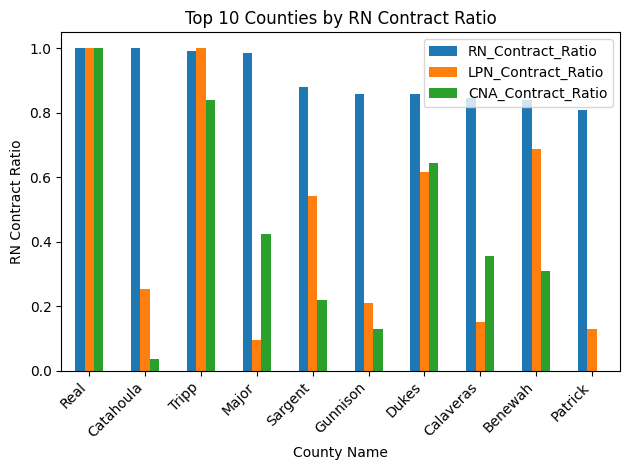

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
high_contract_counties[['RN_Contract_Ratio','LPN_Contract_Ratio','CNA_Contract_Ratio']].plot(kind='bar')
plt.title('Top 10 Counties by RN Contract Ratio')
plt.xlabel('County Name')
plt.ylabel('RN Contract Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analysis:
The chart 3 to 5 shows the top 10 states with facilities with highest contractor ratios. States like Oregon (OR), Massachusetts (MA), and Vermont (VT) have high contractor ratios for Registered Nurses (RNs), Licensed Practical Nurses (LPNs), and Certified Nursing Assistants (CNAs). Specifically, Vermont has the highest contractor ratios for both LPN and CNA V could be a key focus area due to its high reliance on LPN and CNA contractors.

This chart 6  shows the counties with the highest contractor ratios.Counties such as Real County,
TX, and Tripp County, SD, exhibit extremely high contractor reliance ratios, often exceeding 80%. Facilities in these regions are more likely to depend on staffing agencies like  the leading Health jobboard to meet their workforce needs.

**Recommendation**:
Prioritize sales outreach to nursing homes in states and counties with high contractor reliance. Highlight  the leading Health jobboard's ability to provide reliable contractor staffing solutions tailored to their needs.
Develop targeted digital and traditional marketing campaigns emphasizing the benefits of the leading Health jobboard's platform, such as flexibility, quality assurance to these areas.


# Recommendation 2: Facilities with Lowest Staffing Hours Per Resident

In [ ]:
# Facilities with Lowest Staffing Hours per Resident
df['Total_Hours'] = df[['Hrs_RN', 'Hrs_LPN', 'Hrs_CNA']].sum(axis=1)
df['Hours_Per_Resident'] = df['Total_Hours'] / df['MDScensus']

In [ ]:
# Facilities with Lowest Staffing Hours per Resident

low_staffing_facilities = (
    df[['PROVNAME', 'STATE', 'COUNTY_NAME', 'MDScensus', 'Total_Hours', 'Hours_Per_Resident']]
    .sort_values(by='Hours_Per_Resident', ascending=True)
    .groupby('PROVNAME')
    .first()
    # Applying the filter to the DataFrame within the parentheses
    [lambda x: (x[['Hours_Per_Resident', 'Total_Hours', 'MDScensus']] > 0).all(axis=1)]
    .query('Hours_Per_Resident < 3.48') # Filter the facilities that have less than the Federal mandate 3.48 hour
    .head(10)
)
print("\nFacilities with Lowest Staffing Hours Per Resident:")
low_staffing_facilities


Facilities with Lowest Staffing Hours Per Resident:


,STATE,COUNTY_NAME,MDScensus,Total_Hours,Hours_Per_Resident
PROVNAME,,,,,
24TH PLACE,OK,Cleveland,67,92.95,1.387313
60 WEST,CT,Hartford,93,302.85,3.256452
A HOLLY PATTERSON EXTENDED CARE FACILITY,NY,Nassau,471,990.50,2.102972
"A.G. RHODES HOME, INC - COBB",GA,Cobb,108,308.67,2.858056
"A.G. RHODES HOME, INC, THE",GA,Fulton,109,361.05,3.312385
AARON MANOR NURSING & REHABILITATION,CT,Middlesex,56,157.50,2.812500
AARON MANOR REHABILITATION AND NURSING CENTER,NY,Monroe,130,371.80,2.860000
AASE HAUGEN HOME,IA,Winneshiek,62,126.99,2.048226
ABBEY DELRAY,FL,Palm Beach,85,278.75,3.279412


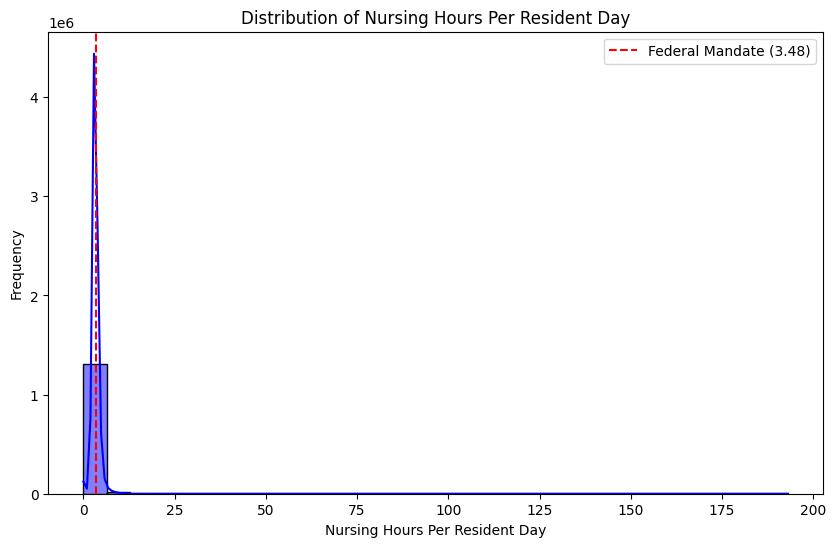

In [ ]:
# Plot the histogram of nursing hours per resident day
plt.figure(figsize=(10, 6))
sns.histplot(df['Hours_Per_Resident'], bins=30, kde=True, color='blue')
# Add a vertical line for the federal mandate threshold
plt.axvline(x=3.48, color='red', linestyle='--', label='Federal Mandate (3.48)')
# Add titles and labels
plt.title('Distribution of Nursing Hours Per Resident Day')
plt.xlabel('Nursing Hours Per Resident Day')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.show()


Analysis:
The chart 7 shows how nursing hours are distributed across facilities, and a focus on compliance with the federal mandate of 3.48 hours per resident day. These facilities on the left of the red line struggle to meet federal staffing benchmarks of 3.48 hours per resident.  These facilities may face penalties or quality-of-care issues, making them prime candidates for the leading Health jobboard to solve their understaffing issues.

Recommendation:
Identify nursing homes with the lowest HPRD from the dataset and approach them with tailored solutions to help meet federal requirements. Highlight how the leading Health jobboard’s platform can provide reliable contractor staff to improve these facilities with their staffing levels and avoid penalties.


# Recommendation 3: Leverage Penalty Data to Address Staffing Gaps in High-Risk Facilities

In [ ]:
penality_file_path = '/content/drive/MyDrive/Clipboard interview /NH_Penalties_Nov2024.csv'
# Import the CSV file into a pandas DataFrame
penality_df = pd.read_csv(penality_file_path, encoding='cp1252')

In [ ]:
#to filter peanlity date in q2 2024
penality_df['Penalty Date'] = pd.to_datetime(penality_df['Penalty Date'])
start_date_q2_2024 = pd.to_datetime('2024-04-01')
end_date_q2_2024 = pd.to_datetime('2024-06-30')
penality_df_filtered = penality_df[((penality_df['Penalty Date'] >= start_date_q2_2024) & (penality_df['Penalty Date'] <= end_date_q2_2024))]

In [ ]:
#look at fine amount
penality_df_filtered['Fine Amount'].describe()

,Fine Amount
count,918.000000
mean,55184.080610
std,69148.595514
min,410.000000
25%,14684.250000
50%,25847.000000
75%,64997.500000
max,483745.000000


In [ ]:
#merge df with penality
merged_df = pd.merge(df, penality_df_filtered, left_on='PROVNUM', right_on='CMS Certification Number (CCN)', how='left')

In [ ]:
# Calculate total contractor ratio
merged_df['contractor_ratio'] = (merged_df['Hrs_CNA_ctr'] + merged_df['Hrs_LPN_ctr'] + merged_df['Hrs_RN_ctr']) / (merged_df['Hrs_CNA'] + merged_df['Hrs_LPN'] + merged_df['Hrs_RN'])

# Filter for high contractor usage that are above 50%  and recent penalties
target_facilities = merged_df[
    (merged_df['contractor_ratio'] > 0.5) &
    (merged_df['Fine Amount'] > merged_df['Fine Amount'].median())
]
# Keep only unique facilities based on 'PROVNAME'
target_facilities = target_facilities.drop_duplicates(subset='PROVNAME', keep='first')

In [ ]:
#show the states of target facilities
fig = px.choropleth(target_facilities.groupby('STATE')['contractor_ratio'].mean().reset_index(),
                     locations='STATE', locationmode="USA-states",
                     color='contractor_ratio',
                     scope="usa",
                     title="Target Facilities by State")
fig.show()

The chart 8 shows facilities that received most penalties in Q2 2024 that also have more than 50% of contractor dependency. These facilities are under pressure to improve their performance and may be more open to staffing solutions from the leading Health jobboard. I selected facilities with over 50% contractor dependency because this represents a significant reliance on contract staff. These facilities are more likely to benefit from a leading Health jobboard's services, as they already depend heavily on contractors for staffing.

Recommendation:
Position the leading Health jobboard as a partner that can help them tackle compliance issues by improving staffing levels.
Offer tailored plans that focus on providing these facilities with consistent staff availability.




# Conclusion



The analysis highlights key opportunities for the leading Health jobboard to expand its impact and address  staffing needs for highlighted regions and facilities:
Target High Contractor Reliance Areas: States like Vermont, Oregon, and Massachusetts, as well as counties such as Real County, TX, shows high contractor ratios. These regions are prime candidates for  outreach campaigns emphasizing the leading Health jobboard's ability to provide reliable contractor staffing solutions.

Support Facilities with Low Staffing Hours: Many facilities fall below the federal mandate of 3.48 nursing hours per resident day, making them potential clients for the leading Health jobboard's services. The leading Health jobboard can help these facilities improve compliance and care quality.

Assist High-Penalty Facilities with Staffing Gaps: Facilities with significant penalties and over 50% contractor dependency face pressure to improve their performance. the leading Health jobboard can position itself as a strategic partner by providing consistent staffing solutions to help these facilities meet regulatory requirements.

By focusing on these areas, the leading Health jobboard can strengthen its market leader position.
